# Практическая работа №2

### Используемые библиотеки

In [1]:
from math import sqrt

import pandas as pd
from sklearn.decomposition import PCA
from numpy.linalg import eigvals

### Глобальные переменные

### Исходные данные
`data1.csv`:
```csv
a1,a2
4,2.9
2.5,1
3.5,4
2,2.1
```
`data2.csv`:
```csv
a1,a2
8,-20
0,-1
10,-19
10,-20
2,0
```

## Задание 1

In [2]:
frame = pd.read_csv('data1.csv')
print(f"Исходный набор данных:")
frame

Исходный набор данных:


,a1,a2
0,4.0,2.9
1,2.5,1.0
2,3.5,4.0
3,2.0,2.1


#### Ядерная матрица
Ядерная матрица отражает близость между двумя наблюдениями согласно метрике, в данном случае задаваемой функцией сходства $k$:
\begin{equation}
    k(x_i, x_j) = \lvert\lvert x_i-x_j \rvert\rvert^2 = (x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2
\end{equation}
,где $X_i$ - $i$е наблюдение, $X_{in}$ - $n$й признак $i$го наблюдения.

In [3]:
def k(x1, x2):
    return (x1["a1"] - x2["a1"])**2 + (x1["a2"] - x2["a2"])**2

print("Ядерная матрица:")
pd.DataFrame([[k(frame.loc[i], frame.loc[j]) for j in range(0, 4)] for i in range(0, 4)])

Ядерная матрица:


,0,1,2,3
0,0.00,5.86,1.46,4.64
1,5.86,0.00,10.00,1.46
2,1.46,10.00,0.00,5.86
3,4.64,1.46,5.86,0.00


## Задание 2

In [4]:
frame = pd.read_csv('data2.csv')
print(f"Исходный набор данных:")
frame

Исходный набор данных:


,a1,a2
0,8,-20
1,0,-1
2,10,-19
3,10,-20
4,2,0


#### Математическое ожидание
##### В данном случае математическое ожидание представляет из себя вектор, его компоненты - средние по всем признакам.
##### Формула (для каждой компоненты):
\begin{equation}
    \mu(x) = \frac{1}{n}\sum^{n}_{i=1}x_i
\end{equation}
,где $x$ - признак, $n$ - количество наблюдений признак.

In [5]:
mean = frame.mean()
print("Среднее:")
pd.DataFrame(mean)

Среднее:


,0
a1,6.0
a2,-12.0


#### Ковариационная матрица
##### Ковариационная матрица — квадратная симметрическая неотрицательно определенная матрица, на диагонали которой располагаются дисперсии компонент вектора, а внедиагональные элементы — ковариации между компонентами.
##### Формула:
\begin{equation}
    H(x, y) =
    \begin{bmatrix}
        D[x] & cov(x, y) \\
        cov(x, y) & D[y]
    \end{bmatrix}
\end{equation}
, где $x$, $y$ - признаки, $cov$ - ковариация признаков.

#### Ковариация
##### Ковариация — мера линейной зависимости двух случайных величин.
##### Формула:
\begin{equation}
    cov(x, y) = \frac{\sum^{n}_{i=1}(x_i - \mu(x))(y_i - \mu(y))}{n - 1}
\end{equation}
, где $x$, $y$ - признаки, $n$ - количество наблюдений признака, $\mu$ - среднее значение признака.

In [6]:
covariant = frame.cov()
print("Ковариационная матрица:")
covariant

Ковариационная матрица:


,a1,a2
a1,22.0,-47.5
a2,-47.5,110.5


#### Собственные числа
##### Собственный вектор - вектор, который при умножении на некоторую квадратную матрицу превращается в самого же себя с неким числовым коэффициентом.
##### Собственное число (значение) - упомянутый выше числовой коэффициент
##### Формула:
\begin{equation}
    M \cdot
    \begin{bmatrix}
        x \\ y
    \end{bmatrix}
    = \lambda \cdot
    \begin{bmatrix}
        x \\ y
    \end{bmatrix}
\end{equation}
, где $M$ - матрица 2x2, $(x, y)$ - собственный вектор, $\lambda$ - собственное число.

In [7]:
eig = eigvals(covariant.values)
print("Собственные числа для ковариационной матрицы:")
pd.DataFrame(eig, index=frame.columns)

Собственные числа для ковариационной матрицы:


,0
a1,1.332264
a2,131.167736


#### Корреляция
##### Корреляция — взаимосвязь двух или более случайных величин. В данном случае представлена матрица коэффициентов корреляции между величинами.
##### Формула (коэффициент):
\begin{equation}
    r(x, y) = \frac{\sum^{n}_{i=1}(x_i - \mu(x))(y_i - \mu(y))}{\sum^{n}_{i=1}(x_i - \mu(x))^2\sum^{n}_{i=1}(y_i - \mu(y))^2}
\end{equation}
, где $x$, $y$ - признаки, $n$ - количество наблюдений признак, $\mu$ - среднее значение признака.

In [8]:
print("Матрица корреляций:")
frame.corr()

Матрица корреляций:


,a1,a2
a1,1.000000,-0.963388
a2,-0.963388,1.000000


## Задание 3

#### Главные компоненты
Некоторые признаки можно объединить, чтобы работать с более простой моделью.
Параметр $n\_components$ указывает на количество измерений, на которые будет производиться проекция.

In [9]:
pca = PCA(n_components=2)
pca.fit_transform(frame)

print("Первые две главные компоненты:")
pd.DataFrame(pca.components_, columns=frame.columns)

Первые две главные компоненты:


,0,1
a1,-0.398979,0.916960
a2,-0.916960,-0.398979


#### Остаточная дисперсия
Для определенной компоненты - дисперсия, которую не покрывает компонента.

In [10]:
print("Остаточная дисперсия компонент:")
pd.DataFrame([eig[0] / sum(eig), eig[1] / sum(eig)])

Остаточная дисперсия компонент:
[0.98994518 0.01005482]


,0
0,0.010055
1,0.989945


#### Вектора главных компонент
Графическое представление главных компонент.

График векторов главных компонент:


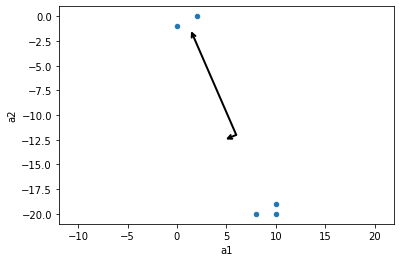

In [11]:
plot = frame.plot.scatter("a1", "a2")
plot.axis("equal")
print("График векторов главных компонент:")

for length, vector in zip(pca.explained_variance_, pca.components_):
    props = {"arrowstyle": "->", "linewidth": 2, "shrinkA": 0, "shrinkB": 0}
    plot.annotate("", mean + vector * sqrt(length), mean, arrowprops=props)
